In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
# a. Describe the dataset
print("Dataset Description:")
print(data.describe())
print("\nDataset Info:")
print(data.info())

Dataset Description:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4),

In [4]:
# b. Correlation among variables
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


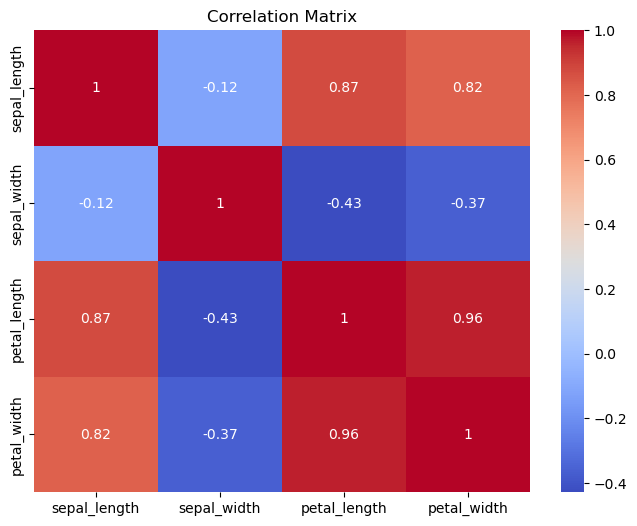

In [5]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# c. Perform PCA
# Separate features and target
features = data.drop('species', axis=1)  # Replace 'species' with the actual target column name
target = data['species']

In [7]:
# Standardize the dataset
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA with maximum components
pca = PCA(n_components=len(features.columns))
pca_result = pca.fit_transform(features_scaled)

In [8]:
# d. Principal components and contributions
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

print("\nPrincipal Components:")
print(pca.components_)

# Correlation of PCs with original variables
pc_corr = pd.DataFrame(pca.components_, columns=features.columns, index=[f"PC{i+1}" for i in range(len(features.columns))])
print("\nCorrelation of PCs with Original Variables:")
print(pc_corr)


Explained Variance Ratio:
[0.72962445 0.22850762 0.03668922 0.00517871]

Principal Components:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]

Correlation of PCs with Original Variables:
     sepal_length  sepal_width  petal_length  petal_width
PC1      0.521066    -0.269347      0.580413     0.564857
PC2      0.377418     0.923296      0.024492     0.066942
PC3      0.719566    -0.244382     -0.142126    -0.634273
PC4     -0.261286     0.123510      0.801449    -0.523597


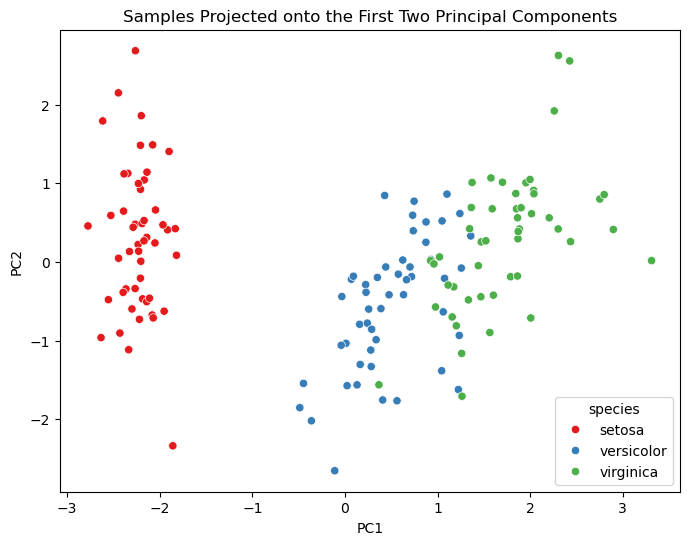

In [9]:
# e. Plot samples in the first two PCs
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=target, palette='Set1')
plt.title('Samples Projected onto the First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# f. Color samples by species
# Color is already applied in the above scatter plot as we used hue=target